# Narrative Flow of Men and Women



 ### Hypothesis:

Men and women discuss sociability and solidarity in different ways, i.e. in different contexts. (..) Solidarity and social relations were different in the men and women section of Birkenau; men and women recall them in different ways and contexts. In practice, this means that they are primed and followed by different topics in the narratives of men and women.

If the hypothesis is true:
- the story line (or narrative flow) leading to the discussion of sociability and solidarity is different in testimonies of men and women
- the most likely sequences of topics (to be named narrative pathway) leading to topics describing solidarity and sociability are different
- different amount of traffic is going through  similar pathways leading to solidarity and sociability
- different nodes (to be named priming topics) are preceding and following (to be named exit topics) topics of solidarity and sociability


Key research questions to be studied here:
- What are the major pathways between the memory of arrival to Birkenau and leaving from Birkenau?
- How are nodes related to solidarity (food sharing, aid giving) and social bonds (friends, social bonds, family) are situated along the major pathways? For women and men, are they peripheral or central? I.e. do a significant amount of narrative flow go towards them for men and women?
- What are the exit and priming topics for solidarity (food sharing, aid giving) and social bonds for men and women?
- How are these topics related to survival explanations?
- How is friendship related to aid giving for men and for women? What are the transitory topics between them?
- What are those topics that prime topics of solidarity and social bonds?
- Where did solidarity take place? In what contexts did solidarity take place?
- What topics do topics related to solidarity and social bonds prime for men and women?


In [1]:
import constants
import pandas as pd
import os
from IPython.display import display
import json
import pyemma
from tables import *
import sys; sys.path.insert(0, '..')
from markov_modelling.markov_utils import *

## Load the relevant data

Load interview

Set up the paths to data

Two different datasets were created. In Dataset 1, the topic 'social bonds' include 'friendship' as well; similarly the topic 'aid giving' includes 'food sharing'. In Dataset 2, 'friendship' and 'food sharing' are distinguished, and they are different topics.

First, load Dataset 1

In [489]:
input_directory = constants.output_data_markov_modelling
path = os.getcwd()
parent = os.path.abspath(os.path.join(path, os.pardir))
input_directory = parent +'/'+ constants.output_data_markov_modelling
data_set_1_w  = pyemma.load(input_directory+'complete_w'+'/'+'pyemma_model','simple')
data_set_1_m = pyemma.load(input_directory+'complete_m'+'/'+'pyemma_model','simple')
data_set_1_complete = pyemma.load(input_directory+'complete'+'/'+'pyemma_model','simple')
input_directory = parent +'/'+ constants.output_data_segment_keyword_matrix
features_df = pd.read_csv(input_directory+constants.output_segment_keyword_matrix_feature_index)
features_df = features_df.drop(columns=['Unnamed: 0','index'])

Load Dataset 2

In [490]:
input_directory = 'data/output_aid_giving_sociability_expanded/output/markov_modelling/'

path = os.getcwd()
parent = os.path.abspath(os.path.join(path, os.pardir))
input_directory = parent +'/'+ input_directory
data_set_2_w  = pyemma.load(input_directory+'complete_w'+'/'+'pyemma_model','simple')
data_set_2_m = pyemma.load(input_directory+'complete_m'+'/'+'pyemma_model','simple')
data_set_2_complete = pyemma.load(input_directory+'complete'+'/'+'pyemma_model','simple')
input_directory = parent +'/'+ 'data/output_aid_giving_sociability_expanded/output//segment_keyword_matrix/'
features_df_2 = pd.read_csv(input_directory+constants.output_segment_keyword_matrix_feature_index)
features_df_2 = features_df_2.drop(columns=['Unnamed: 0','index'])


## Observation 1

### Qualitative description

For women, the main topic that primes the discussion of aid giving is the discussion of the living conditions. By contrast, the most important topic that primes aid giving for men is the discussion of forced labour activity. 

For women, the most important narrative trajectory leading to the discussion of aid giving is the following one (8.3 % of the total traffic is going through it):
- arrival-camp intake procedures-living conditions-aid giving

For men, the most important narrative trajectory leading to the discussion of aid giving is the following one (5 % of the total traffic is going through it):
- arrival-selections-camp intake procedures-living conditions-forced labor-aid giving

Both men and women discuss aid giving in the context of camp living conditions and forced labour, women are more likely to discuss it in the context of camp living conditions. While men are more likely to discuss it in the context of forced labour.

In [39]:
story_start = 'arrival'
story_end = 'aid giving'
state_index = features_df.KeywordLabel.to_list()

In [40]:
flux_w = calculate_flux(data_set_1_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=0.1)

Path flux		%path	%of total	path
arrival-camp intake procedures-living conditions-aid giving
8.347044761796539
arrival-selections-camp intake procedures-tattoo-forced labor-aid giving
5.307967231145708


In [41]:
flux_m = calculate_flux(data_set_1_m,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=0.1)

Path flux		%path	%of total	path
arrival-selections-camp intake procedures-living conditions-forced labor-aid giving
6.650854339126532
arrival-camp intake procedures-living conditions-aid giving
5.026433166458985


### Visualization

7 labels to show
6 labels to show


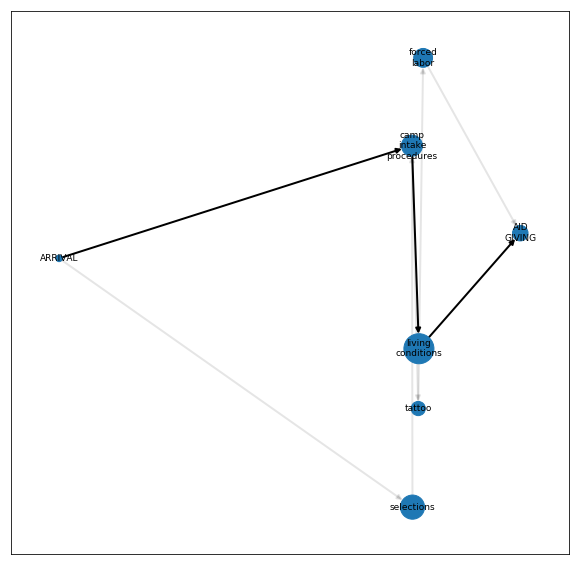

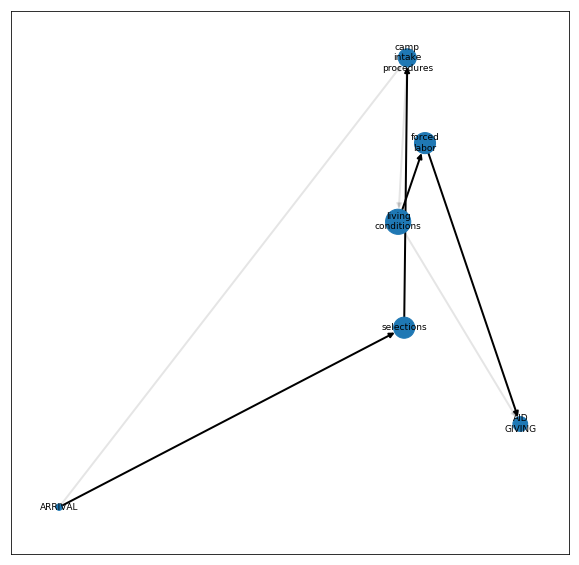

In [30]:
flux = 0.1
visualize_most_important_paths(data_set_1_w,flux,features_df,story_start,story_end,None)
visualize_most_important_paths(data_set_1_m,flux,features_df,story_start,story_end,None)

In [56]:
story_start = 'living conditions'
story_end = 'aid giving'
state_index = features_df.KeywordLabel.to_list()

In [57]:
flux_w = calculate_flux(data_set_1_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=0.1)

Path flux		%path	%of total	path
living conditions-aid giving
10.226749809944772


In [58]:
flux_m = calculate_flux(data_set_1_m,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=0.1)

Path flux		%path	%of total	path
living conditions-forced labor-aid giving
7.227237757338275
living conditions-aid giving
6.503761971784238


In [64]:
flux=0.13

3 labels to show
3 labels to show


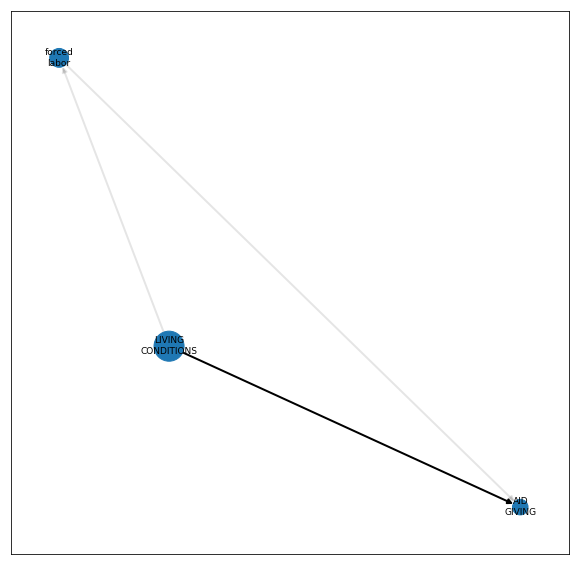

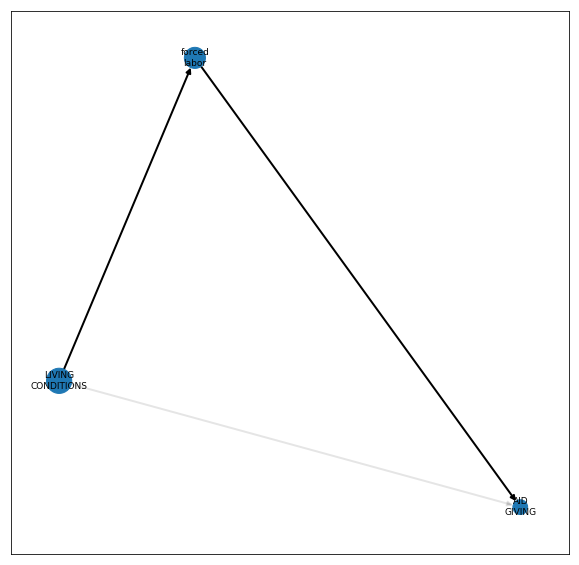

In [65]:
visualize_most_important_paths(data_set_1_w,flux,features_df,story_start,story_end,None)
visualize_most_important_paths(data_set_1_m,flux,features_df,story_start,story_end,None)

## Observation 2

### Qualitative description

As above, a key topic that follows the discussion of aid giving is forced labour. However, this has different weight in the narratives of men and women. Men are more likely to discuss forced labour following aid giving. In testimonies of men, more traffic is going through the following pathway (3,6% women versus 6,2% men):
-aid giving-forced labor-departure.

In [149]:
story_start = 'aid giving'
story_end = 'departure'
flux = 0.25

In [150]:
flux_w = calculate_flux(data_set_1_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)

Path flux		%path	%of total	path
aid giving-selections-camp intake procedures-living conditions-departure
8.101691512233215
aid giving-departure
5.945107320204662
aid giving-living conditions-selections-departure
4.522023548282743
aid giving-camp population-departure
3.874896867158392
aid giving-forced labor-departure
3.6375547207581387


In [151]:
flux_m = calculate_flux(data_set_1_m,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)

Path flux		%path	%of total	path
aid giving-living conditions-departure
6.87480417446932
aid giving-forced labor-departure
6.206534596612857
aid giving-departure
4.807461030964425
aid giving-camp population-departure
4.403741291380718
aid giving-adaptation methods-departure
4.106815167973697


### Visualization

7 labels to show
8 labels to show


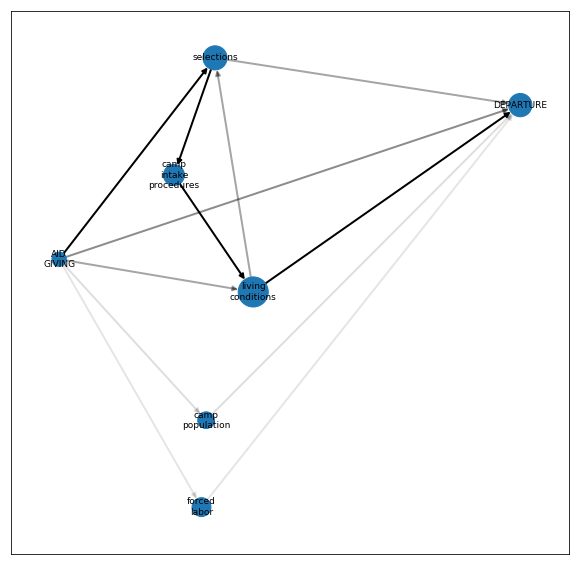

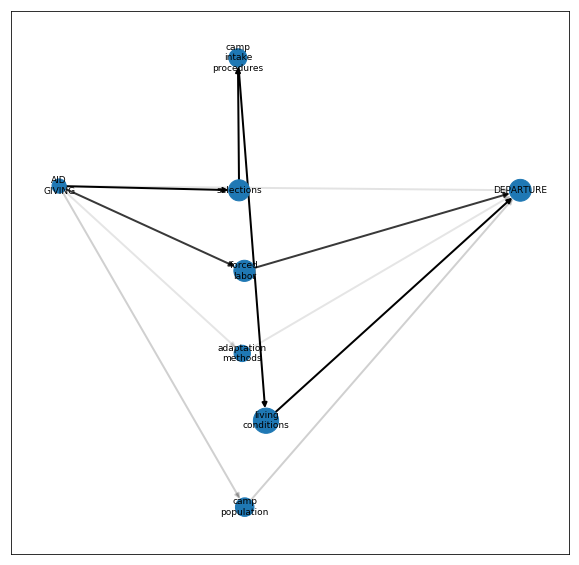

In [148]:
flux = 0.25
visualize_most_important_paths(data_set_2_w,flux,features_df_2,story_start,story_end,None)
visualize_most_important_paths(data_set_2_m,flux,features_df_2,story_start,story_end,None)

## Observation 3

### Qualitative description

Similarly to aid giving, women tend to discuss food sharing in the context of living conditions, whereas men discuss it in the context of forced labour. For women, food sharing is most likely to be primed by the discussion of living conditions, for men food sharing tends to be primed by forced labour. In testimonies of women, the major traffic (16,5%) towards food sharing are going through the following two pathways:
- arrival-camp intake procedures-living conditions-food and thirst-food sharing
- arrival-selections-camp intake procedures-living conditions-food sharing

By contrast, in testimonies of men, the major traffic ( 11.33405389131642%) towards food sharing are going through the following pathways:
- arrival-selections-camp intake procedures-living conditions-forced labor-food sharing




### Visualization

In [201]:
story_start = 'arrival'
story_end = 'food sharing'
flux = 0.17

In [202]:
flux_w = calculate_flux(data_set_2_w,features_df_2.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)

Path flux		%path	%of total	path
arrival-camp intake procedures-living conditions-food and thirst-food sharing
8.546817621231206
arrival-selections-camp intake procedures-living conditions-food sharing
8.174946800246945
arrival-camp intake procedures-tattoo-forced labor-food sharing
7.305378377843888


In [203]:
flux_m = calculate_flux(data_set_2_m,features_df_2.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)

Path flux		%path	%of total	path
arrival-selections-camp intake procedures-living conditions-forced labor-food sharing
11.33405389131642
arrival-camp intake procedures-living conditions-food sharing
8.628746663241586


In [ ]:
flux = 0.17

8 labels to show
6 labels to show


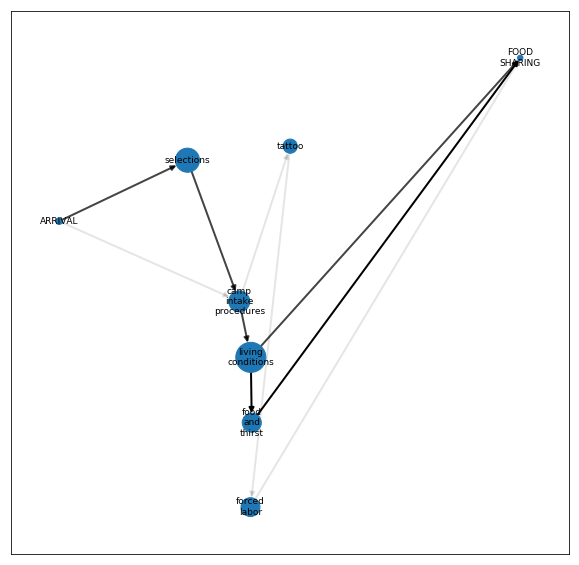

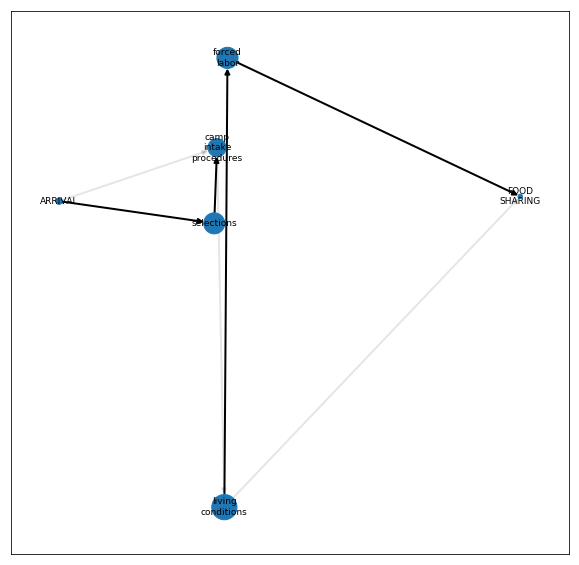

In [205]:
visualize_most_important_paths(data_set_2_w,flux,features_df_2,story_start,story_end,None)
visualize_most_important_paths(data_set_2_m,flux,features_df_2,story_start,story_end,None)

## Observation 4

### Qualitative description

In testimonies of men and women, different topics are the ones that are most likely to follow food sharing. The topic that is the most likely to follow food sharing in women testimonies is again living conditions. By contrast men tend to discuss forced labour and selection following food sharing.

### Visualization

In [209]:
story_start = 'food sharing'
story_end = 'departure'
flux = 0.2

In [210]:
flux_w = calculate_flux(data_set_2_w,features_df_2.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)

Path flux		%path	%of total	path
food sharing-living conditions-departure
7.616097821222385
food sharing-selections-departure
4.667934726837212
food sharing-adaptation methods-departure
4.1619400193523814
food sharing-family-camp intake procedures-living conditions-transfer-departure
3.9392613441857


In [211]:
flux_m = calculate_flux(data_set_2_m,features_df_2.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)

Path flux		%path	%of total	path
food sharing-selections-camp intake procedures-living conditions-departure
7.950784855415325
food sharing-forced labor-departure
6.217045479824542
food sharing-departure
4.091503854864056
food sharing-living conditions-food and thirst-departure
3.9656599974988196


8 labels to show
7 labels to show


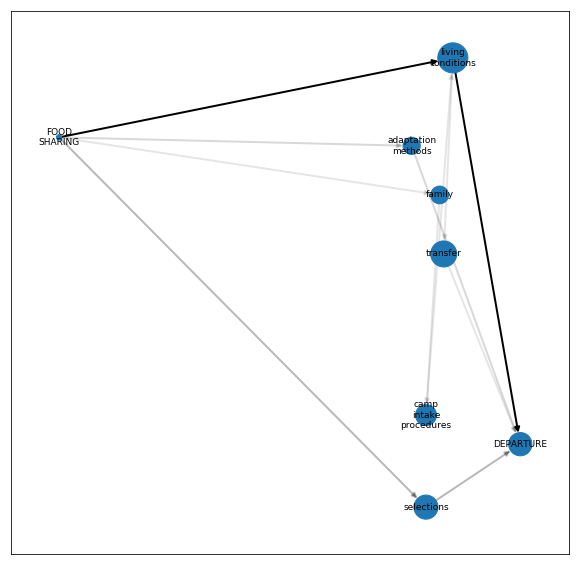

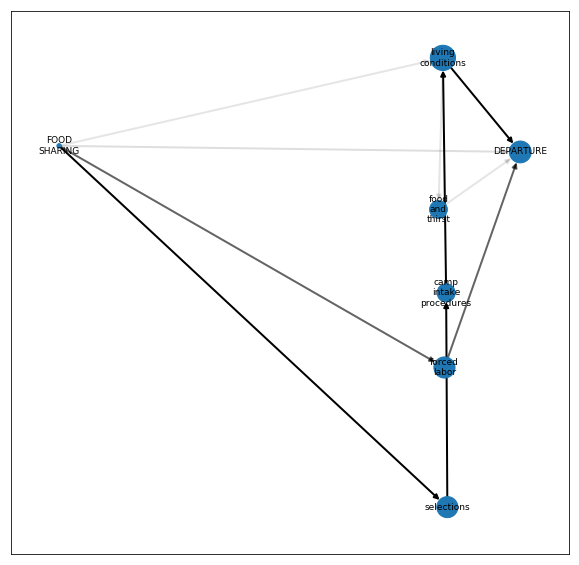

In [208]:
visualize_most_important_paths(data_set_2_w,flux,features_df_2,story_start,story_end,None)
visualize_most_important_paths(data_set_2_m,flux,features_df_2,story_start,story_end,None)

## Observation 5

### Qualitative description

In narratives of women, the discussion of friendship tends to be preceded by the discussion of living environments and housing conditions. Very different amount of traffic is going through the following two narrative pathways :

- Women (12.2%):arrival-camp intake procedures-living conditions-friends
- Men (5.2%): arrival-selections-camp intake procedures-living conditions-friends



## Visualization

Path flux		%path	%of total	path
arrival-camp intake procedures-living conditions-friends
12.23563956737147
arrival-selections-camp intake procedures-living conditions-kapos-friends
5.141156625065869


Path flux		%path	%of total	path
arrival-selections-camp intake procedures-living conditions-friends
5.295176641826937
arrival-camp intake procedures-living conditions-forced labor-friends
4.9503214166993095
arrival-selections-camp intake procedures-living conditions-transfer-friends
4.275689393442793
arrival-selections-camp intake procedures-food and thirst-friends
4.220293264855801
6 labels to show
8 labels to show


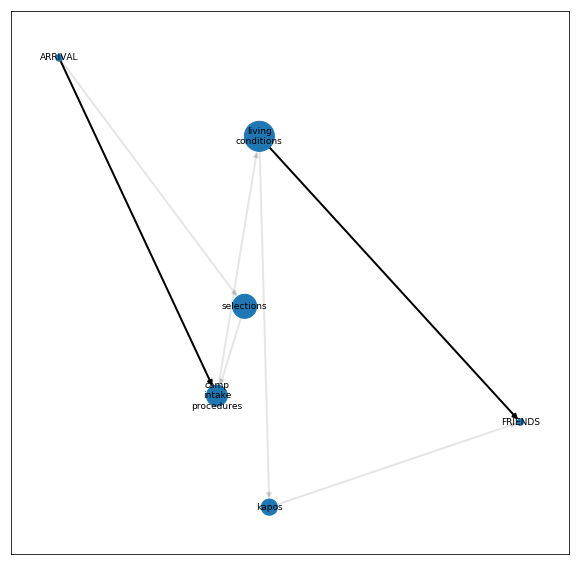

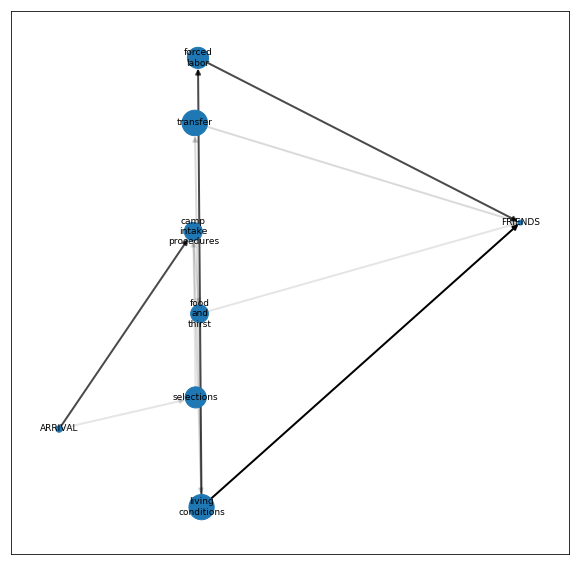

In [231]:
story_start = 'arrival'
story_end = 'friends'
flux = 0.15
flux_w = calculate_flux(data_set_2_w,features_df_2.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)
print ('\n')
flux_m = calculate_flux(data_set_2_m,features_df_2.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)
visualize_most_important_paths(data_set_2_w,flux,features_df_2,story_start,story_end,None)
visualize_most_important_paths(data_set_2_m,flux,features_df_2,story_start,story_end,None)

## Observation 6

### Qualitative description

In narratives of women, the most immediate topic that follows the discussion of friendship is living conditions; this pattern is very weakly present in testimonies of men.


## Visualization

Path flux		%path	%of total	path
friends-living conditions-departure
9.887979488210286
friends-selections-departure
4.913915977648799
friends-adaptation methods-departure
4.169719869713707
friends-camp population-departure
3.8607143465671574
friends-forced labor-departure
3.6945560165534834


Path flux		%path	%of total	path
friends-tattoo-living conditions-departure
5.4638575663739894
friends-camp intake procedures-living conditions-forced labor-departure
5.380729880624658
friends-adaptation methods-departure
4.7603083564874735
friends-transfer-departure
4.102142035914193
friends-selections-camp intake procedures-food and thirst-departure
3.7782082964736126
friends-living conditions-food and thirst-selections-departure
3.701241972656632
7 labels to show
10 labels to show


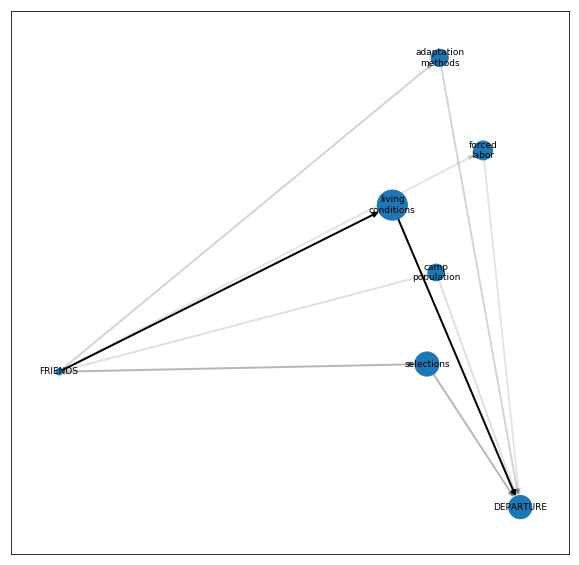

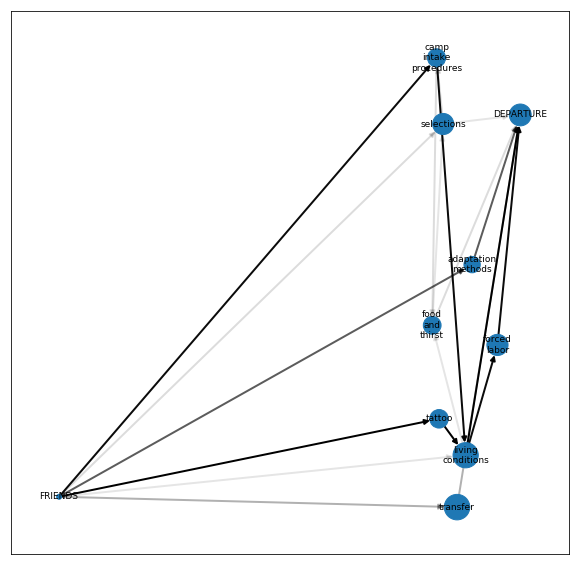

In [238]:
story_start = 'friends'
story_end = 'departure'
flux = 0.25
flux_w = calculate_flux(data_set_2_w,features_df_2.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)
print ('\n')
flux_m = calculate_flux(data_set_2_m,features_df_2.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)
visualize_most_important_paths(data_set_2_w,flux,features_df_2,story_start,story_end,None)
visualize_most_important_paths(data_set_2_m,flux,features_df_2,story_start,story_end,None)

## Observation 7

## Qualitative description

If we look at all possible narrative pathways that can connect arrival to and departure from Birkenau, we  can see that a significant amount of traffic is going through aid giving (4%) and social bonds (3.85%). Their significance can be understood if they are compared to Appel, where 9% of traffic is going through. The amount of traffic going through friendship (0.43%) and food sharing (0.48%) is less significant. I

In case of women, more traffic is going through these nodes, with an exception of food sharing:

- social bonds: 3.9 %
- aid giving: 5 %
- friendship: 0.71
- food sharing:  0.41 %

In case of men, less traffic is going through these nodes:

- social bonds: 3 %
- aid giving: 4 %
- friendship: 0.27
- food sharing:  0.53 %

#### Total traffic going through them in the complete dataset (men and women):

In [563]:
story_start = 'arrival'
story_end = 'departure'
flux = 1
flux_complete = calculate_flux(data_set_1_complete,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)
flux_complete_dataset_2 = calculate_flux(data_set_2_complete,features_df_2.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)


Path flux		%path	%of total	path
arrival-camp intake procedures-living conditions-departure
10.073266922656023
arrival-selections-departure
5.8969264449863275
arrival-selections-camp intake procedures-living conditions-transfer-departure
4.595630529107758
arrival-camp intake procedures-tattoo-forced labor-departure
4.495985564556613
arrival-selections-camp intake procedures-mass murder awareness-departure
3.1455358987515822
arrival-loved ones' separations-camp intake procedures-living conditions-kapos-departure
3.0454903489011946
arrival-family-departure
2.9434070392652294
arrival-camp intake procedures-living conditions-food and thirst-departure
2.7031982495565234
arrival-selections-camp intake procedures-living conditions-adaptation methods-departure
2.667464339966779
arrival-camp population-departure
2.4826899172231536
arrival-loved ones' separations-camp intake procedures-living conditions-social bonds-departure
2.238423013896088
arrival-camp intake procedures-food and thirst-select

Path flux		%path	%of total	path
arrival-camp intake procedures-living conditions-departure
9.85665961657633
arrival-selections-departure
5.914101626755933
arrival-selections-camp intake procedures-living conditions-transfer-departure
4.682230960334272
arrival-camp intake procedures-tattoo-forced labor-departure
4.540682231369251
arrival-selections-camp intake procedures-kapos-departure
3.2067236342473033
arrival-loved ones' separations-camp intake procedures-mass murder awareness-departure
3.136826740743989
arrival-family-departure
2.9797703056194553
arrival-camp intake procedures-living conditions-food and thirst-departure
2.8746914315581953
arrival-selections-camp intake procedures-living conditions-adaptation methods-departure
2.734247165160096
arrival-camp population-departure
2.415195230467054
arrival-loved ones' separations-camp intake procedures-Appell-departure
1.97316779903988
arrival-perpetrators-departure
1.9217456760568927
arrival-camp intake procedures-living conditions-so

Calculate the total traffic going through social bonds

In [564]:
total_social_bonds = []
total_aid_giving = []
total_appell = []
total_friends = []
total_food_sharing = []
total_escapes = []

In [565]:
for i,element in enumerate(flux_complete):
    if 'social bonds' in element.split('-'):
        total_social_bonds.append(flux_complete[element])
print(np.array(total_social_bonds).sum())

3.8508400374924583


Calculate the total traffic going through aid giving

In [566]:
for i,element in enumerate(flux_complete):
    if 'aid giving' in element.split('-'):
        total_aid_giving.append(flux_complete[element])
print(np.array(total_aid_giving).sum())

3.9963902583259667


Calculate the total traffic going through Appell

In [567]:
for i,element in enumerate(flux_complete):
    if 'Appell' in element.split('-'):
        total_appell.append(flux_complete[element])
print(np.array(total_appell).sum())

9.796581402687856


Calculate the total traffic going through escape

In [568]:
for i,element in enumerate(flux_complete):
    if 'escapes' in element.split('-'):
        total_escapes.append(flux_complete[element])
print(np.array(total_escapes).sum())

0.9972138362315421


Calculate the total traffic going through friendship

In [569]:
for i,element in enumerate(flux_complete_dataset_2):
    if 'friends' in element.split('-'):
        total_friends.append(flux_complete_dataset_2[element])
print(np.array(total_friends).sum())

0.43505064671120863


Calculate the total traffic going through food sharing

In [570]:
for i,element in enumerate(flux_complete_dataset_2):
    if 'food sharing' in element.split('-'):
        total_food_sharing.append(flux_complete_dataset_2[element])
print(np.array(total_food_sharing).sum())

0.4867467438927057


#### Total traffic going through them in the dataset of women

In [571]:
story_start = 'arrival'
story_end = 'departure'
flux = 1
flux_w = calculate_flux(data_set_1_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)
flux_w_dataset_2 = calculate_flux(data_set_2_w,features_df_2.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)


Path flux		%path	%of total	path
arrival-camp intake procedures-living conditions-departure
10.391633749239793
arrival-selections-departure
6.589422541141168
arrival-camp intake procedures-living conditions-transfer-departure
5.403039611958874
arrival-selections-camp intake procedures-tattoo-forced labor-departure
3.6791764466903656
arrival-family-departure
3.181997881949709
arrival-loved ones' separations-camp intake procedures-mass murder awareness-departure
2.9825268162459078
arrival-camp intake procedures-kapos-departure
2.841296914724931
arrival-selections-camp intake procedures-living conditions-adaptation methods-departure
2.4952105294549267
arrival-camp population-departure
2.4390350715069604
arrival-loved ones' separations-camp intake procedures-living conditions-food and thirst-departure
2.426048397056161
arrival-selections-camp intake procedures-living conditions-social bonds-departure
2.3785986972449766
arrival-perpetrators-departure
1.9979153385438244
arrival-camp intake pr

Path flux		%path	%of total	path
arrival-camp intake procedures-living conditions-departure
10.25592786453176
arrival-selections-departure
6.6858545428586815
arrival-camp intake procedures-living conditions-transfer-departure
5.127687278934458
arrival-selections-camp intake procedures-tattoo-forced labor-departure
3.709335137979035
arrival-loved ones' separations-camp intake procedures-mass murder awareness-departure
3.045377576527035
arrival-family-departure
3.0452115060003755
arrival-camp intake procedures-kapos-departure
2.8712490680235923
arrival-selections-camp intake procedures-living conditions-adaptation methods-departure
2.7162128783968695
arrival-camp population-departure
2.4332517477563536
arrival-loved ones' separations-camp intake procedures-living conditions-selections-transfer-departure
2.4104636457879263
arrival-camp intake procedures-living conditions-food and thirst-departure
2.359895563143281
arrival-selections-camp intake procedures-Appell-departure
1.968159366768884

In [572]:
total_social_bonds = []
total_aid_giving = []
total_appell = []
total_friends = []
total_food_sharing = []

Calculate the total traffic going through social bonds

In [573]:
for i,element in enumerate(flux_w):
    if 'social bonds' in element.split('-'):
        total_social_bonds.append(flux_w[element])
print(np.array(total_social_bonds).sum())

3.9064777743635983


Calculate the total traffic going through aid giving

In [574]:
for i,element in enumerate(flux_w):
    if 'aid giving' in element.split('-'):
        total_aid_giving.append(flux_w[element])
print(np.array(total_aid_giving).sum())

5.089537978244638


Calculate the total traffic going through friendship

In [575]:
for i,element in enumerate(flux_w_dataset_2):
    if 'friends' in element.split('-'):
        total_friends.append(flux_w_dataset_2[element])
print(np.array(total_friends).sum())

0.717342843113797


Calculate the total traffic going through food sharing

In [576]:
for i,element in enumerate(flux_w_dataset_2):
    if 'food sharing' in element.split('-'):
        total_food_sharing.append(flux_w_dataset_2[element])
        print (element)
        print (flux_w_dataset_2[element])
print(np.array(total_food_sharing).sum())

arrival-mass murder awareness-selections-camp intake procedures-living conditions-food and thirst-food sharing-departure
0.39693646038244335
arrival-food sharing-camp population-selections-camp intake procedures-living conditions-self-preservation acts-departure
0.014707199059528695
arrival-food sharing-camp population-selections-camp intake procedures-Appell-warnings-departure
0.0004352111082056248
0.41207887055017767


#### Total traffic going through them in the dataset of men

In [577]:
story_start = 'arrival'
story_end = 'departure'
flux = 1
flux_m = calculate_flux(data_set_1_m,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)
flux_m_dataset_2 = calculate_flux(data_set_2_m,features_df_2.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)


Path flux		%path	%of total	path
arrival-selections-camp intake procedures-living conditions-departure
8.998893572459055
arrival-camp intake procedures-living conditions-forced labor-departure
6.210529543804366
arrival-selections-departure
4.548600227238684
arrival-camp intake procedures-food and thirst-departure
3.686174670632364
arrival-selections-camp intake procedures-living conditions-kapos-departure
3.5771514013137153
arrival-camp intake procedures-living conditions-transfer-departure
3.3292871770625907
arrival-mass murder awareness-departure
3.2309516797765583
arrival-selections-camp intake procedures-living conditions-adaptation methods-departure
3.230843583977947
arrival-camp population-departure
2.5662994433758093
arrival-loved ones' separations-camp intake procedures-tattoo-departure
2.5573024370464825
arrival-family-departure
2.4867034484946577
arrival-camp intake procedures-tattoo-forced labor-aid giving-departure
2.397527007603035
arrival-selections-camp intake procedures-

Path flux		%path	%of total	path
arrival-selections-camp intake procedures-living conditions-departure
8.53761063437687
arrival-camp intake procedures-living conditions-forced labor-departure
6.275450638437552
arrival-selections-departure
4.373849763759113
arrival-camp intake procedures-food and thirst-departure
4.116659206306907
arrival-selections-camp intake procedures-living conditions-transfer-departure
3.5523574339237953
arrival-camp intake procedures-living conditions-kapos-departure
3.5371609208965022
arrival-selections-camp intake procedures-living conditions-adaptation methods-departure
3.0866375921652076
arrival-mass murder awareness-departure
3.0574852814975353
arrival-loved ones' separations-camp intake procedures-tattoo-departure
2.6403471339053564
arrival-family-departure
2.6215670861915314
arrival-camp population-departure
2.4768405730099867
arrival-camp intake procedures-tattoo-living conditions-Appell-departure
2.3039971251970663
arrival-selections-camp intake procedure

In [578]:
total_social_bonds = []
total_aid_giving = []
total_appell = []
total_friends = []
total_food_sharing = []



Calculate the total traffic going through social bonds

In [579]:
for i,element in enumerate(flux_m):
    if 'social bonds' in element.split('-'):
        total_social_bonds.append(flux_m[element])
print(np.array(total_social_bonds).sum())

3.075040457671815


Calculate the total traffic going through aid giving

In [580]:
for i,element in enumerate(flux_m):
    if 'aid giving' in element.split('-'):
        total_aid_giving.append(flux_m[element])
print(np.array(total_aid_giving).sum())

3.998955268530409


Calculate the total traffic going through friendship

In [581]:
for i,element in enumerate(flux_m_dataset_2):
    if 'friends' in element.split('-'):
        total_friends.append(flux_m_dataset_2[element])
print(np.array(total_friends).sum())

0.2766069900947232


Calculate the total traffic going through food sharing

In [584]:
total_food_sharing = []

In [585]:
for i,element in enumerate(flux_m_dataset_2):
    if 'food sharing' in element.split('-'):
        print (element)
        print (flux_m_dataset_2[element])
        total_food_sharing.append(flux_m_dataset_2[element])
print(np.array(total_food_sharing).sum())

arrival-diseases-selections-camp intake procedures-social bonds-camp population-transfer-loved ones' contacts-food sharing-departure
0.4147404520876082
arrival-food sharing-selections-Mengele, Josef-mass murder awareness-medical care-killings-survival explanations-attitudes-departure
0.06423157395643435
arrival-loved ones' contacts-tattoo-living conditions-food sharing-departure
0.05552186944893255
0.5344938954929751


## Observation 8

### Qualitative Description

For women, the most important priming and exit topic of friendship is the discussion of living conditions; by contrast, the most important exit and priming topics for men is forced labour.

6 labels to show
10 labels to show


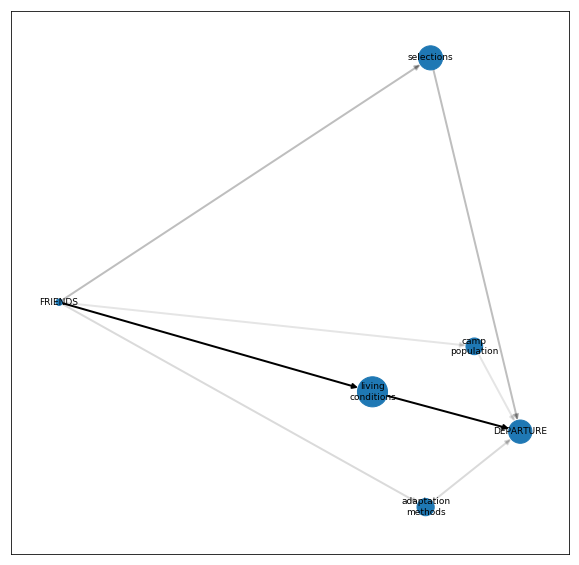

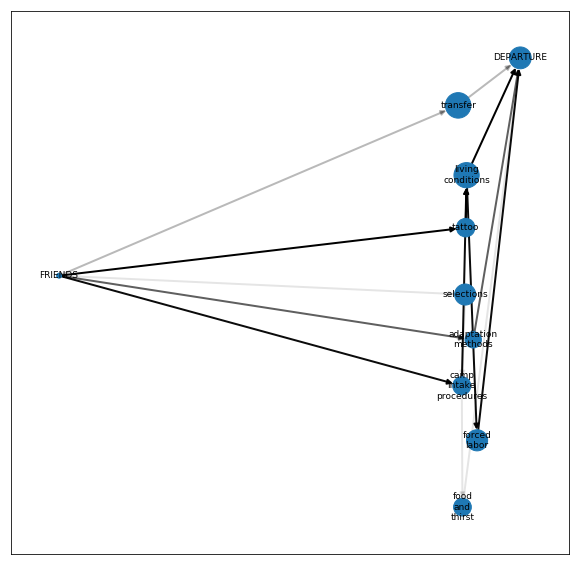

In [281]:
story_start = 'friends'
story_end = 'departure'
flux = 0.2
visualize_most_important_paths(data_set_2_w,flux,features_df_2,story_start,story_end,None)
visualize_most_important_paths(data_set_2_m,flux,features_df_2,story_start,story_end,None)

6 labels to show
8 labels to show


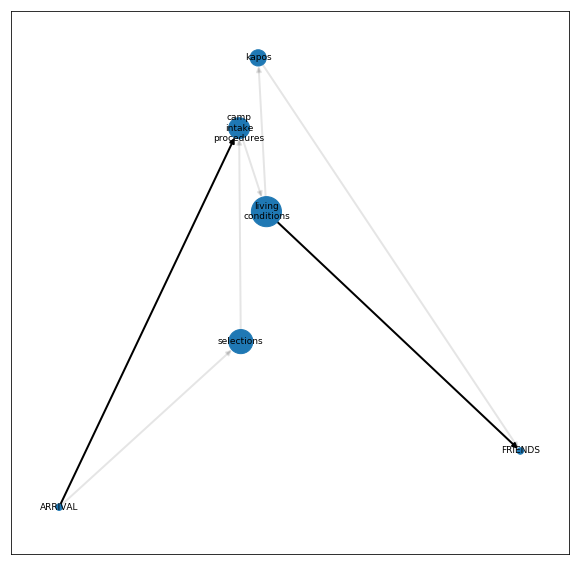

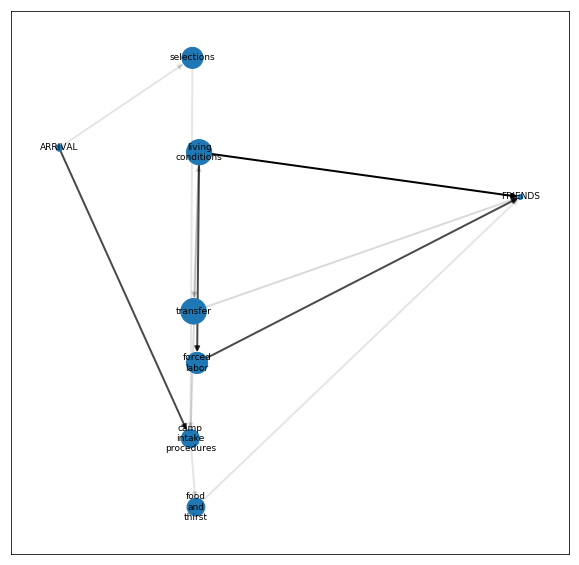

In [282]:
story_start = 'arrival'
story_end = 'friends'
flux = 0.15
visualize_most_important_paths(data_set_2_w,flux,features_df_2,story_start,story_end,None)
visualize_most_important_paths(data_set_2_m,flux,features_df_2,story_start,story_end,None)

## Observation 9

### Qualitative description

For women, food sharing concentrated on the barack; for men it concentrated on both the barrack and the forced labour activity;

### Visualization

8 labels to show
6 labels to show


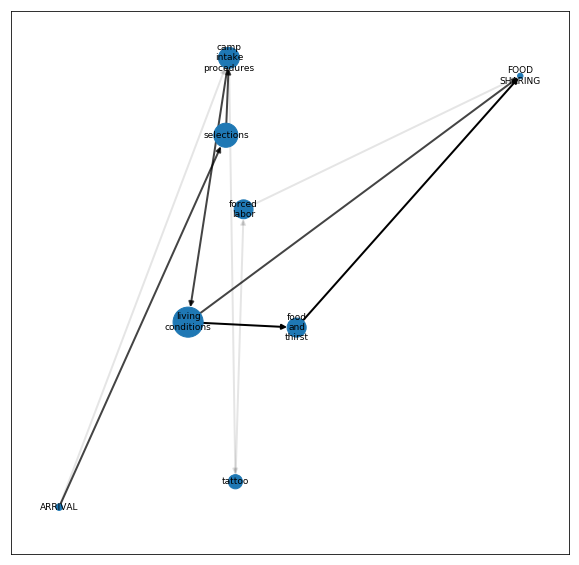

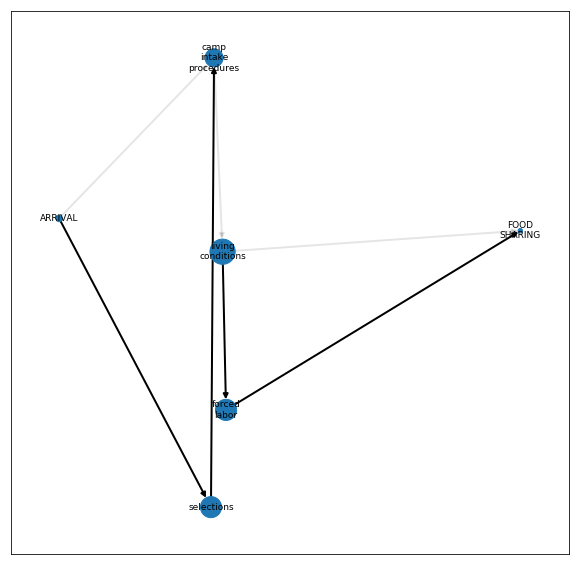

In [283]:
story_start = 'arrival'
story_end = 'food sharing'
flux = 0.17
visualize_most_important_paths(data_set_2_w,flux,features_df_2,story_start,story_end,None)
visualize_most_important_paths(data_set_2_m,flux,features_df_2,story_start,story_end,None)

8 labels to show
6 labels to show


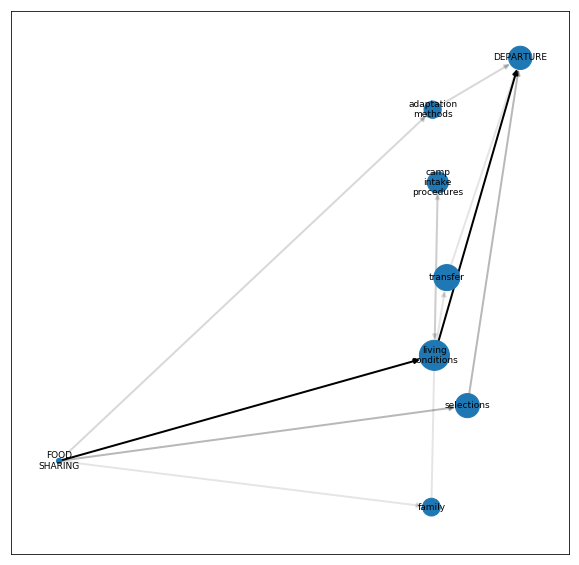

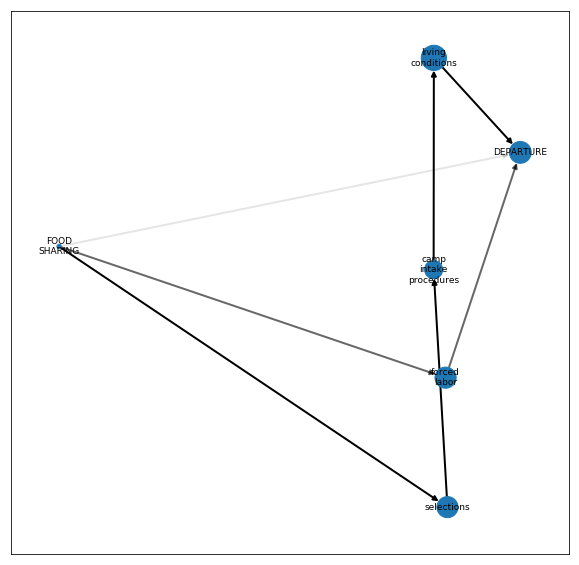

In [284]:
story_start = 'food sharing'
story_end = 'departure'
flux = 0.17
visualize_most_important_paths(data_set_2_w,flux,features_df_2,story_start,story_end,None)
visualize_most_important_paths(data_set_2_m,flux,features_df_2,story_start,story_end,None)

## Observation 10

### Qualitative Description:

Men and women discuss social bonds in the context of housing

6 labels to show
7 labels to show


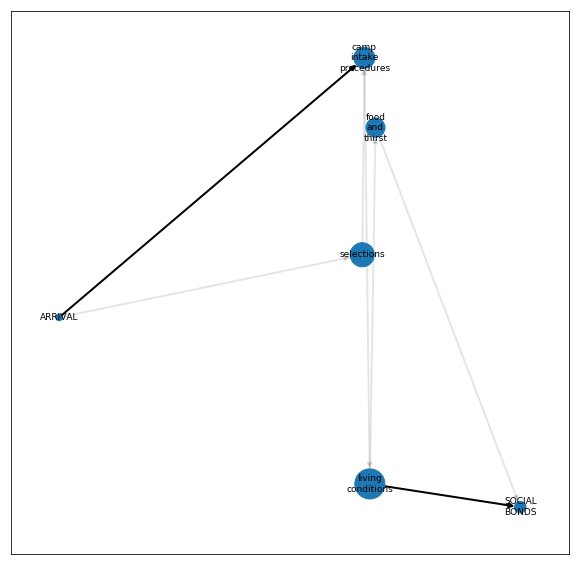

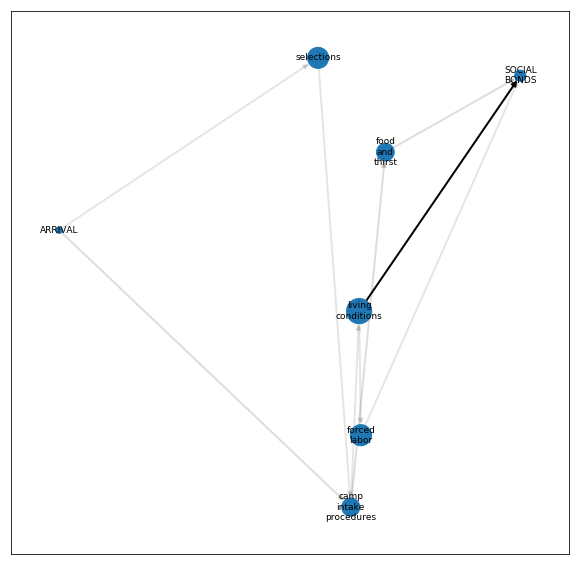

In [285]:
story_start = 'arrival'
story_end = 'social bonds'
flux = 0.2
visualize_most_important_paths(data_set_2_w,flux,features_df_2,story_start,story_end,None)
visualize_most_important_paths(data_set_2_m,flux,features_df_2,story_start,story_end,None)